In [3]:
# Importin packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
drle = pd.read_csv(r'C:\Users\hp\Documents\Datasets\NCHS_-_Death_rates_and_life_expectancy_at_birth.csv')
drle.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900.0,All Races,Both Sexes,47.3,2518.0
1,1901.0,All Races,Both Sexes,49.1,2473.1
2,1902.0,All Races,Both Sexes,51.5,2301.3
3,1903.0,All Races,Both Sexes,50.5,2379.0
4,1904.0,All Races,Both Sexes,47.6,2502.5


In [84]:
drle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1065 non-null   float64
 1   Race                             1065 non-null   object 
 2   Sex                              1065 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
 4   Age-adjusted Death Rate          1065 non-null   float64
dtypes: float64(3), object(2)
memory usage: 42.0+ KB


It can be noted from this that there are six null entries from each column.

In [85]:
# Confirming nulls
drle.isna().sum()

Year                               6
Race                               6
Sex                                6
Average Life Expectancy (Years)    6
Age-adjusted Death Rate            6
dtype: int64

In [86]:
drle = drle.dropna()
drle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1065 entries, 0 to 1064
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1065 non-null   float64
 1   Race                             1065 non-null   object 
 2   Sex                              1065 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
 4   Age-adjusted Death Rate          1065 non-null   float64
dtypes: float64(3), object(2)
memory usage: 49.9+ KB


The nulls were dropped rather than filled with mean or mode because their subtraction will not significantly affect the number of entries in the dataframe.

In [87]:
# Ivestiagting duplicates
drle.duplicated().sum()

0

In [88]:
# Selecting df with all races and both sex
data = drle[(drle['Race'] == 'All Races') & (drle['Sex'] == 'Both Sexes')]
data.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900.0,All Races,Both Sexes,47.3,2518.0
1,1901.0,All Races,Both Sexes,49.1,2473.1
2,1902.0,All Races,Both Sexes,51.5,2301.3
3,1903.0,All Races,Both Sexes,50.5,2379.0
4,1904.0,All Races,Both Sexes,47.6,2502.5


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             119 non-null    float64
 1   Race                             119 non-null    object 
 2   Sex                              119 non-null    object 
 3   Average Life Expectancy (Years)  119 non-null    float64
 4   Age-adjusted Death Rate          119 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.6+ KB


In [90]:
data.shape

(119, 5)

In [91]:
data.describe()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate
count,119.000000,119.000000,119.00000
mean,1959.000000,66.954622,1459.02605
std,34.496377,9.717578,559.48246
min,1900.000000,39.100000,723.60000
25%,1929.500000,59.850000,959.75000
50%,1959.000000,69.700000,1332.30000
75%,1988.500000,75.000000,1960.95000
max,2018.000000,78.900000,2541.60000


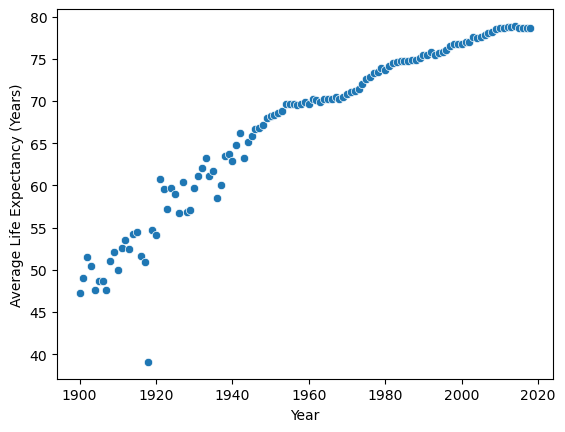

In [93]:
# Eliminating outliers
sns.scatterplot(x=data['Year'],y=data['Average Life Expectancy (Years)'])
plt.show()

In [97]:
# Since the outlier is clearly the lowest in average life expectancy;
min = data['Average Life Expectancy (Years)'].idxmin() #Find the row with lowest life expectancy
data = data.drop(min).reset_index(drop=True) # Drop that row

In [98]:
# Renaming 'Average Life Expectancy (Years)' to add it to OLS
data = data.rename(columns={'Average Life Expectancy (Years)':'Expectancy'})
data.columns

Index(['Year', 'Race', 'Sex', 'Expectancy', 'Age-adjusted Death Rate'], dtype='object')

Exploratory Data Analysis

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


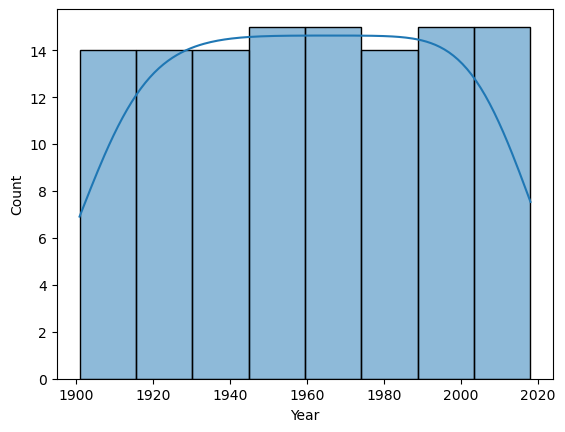

In [99]:
# To investigate the distribution of years
sns.histplot(data['Year'], kde=True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


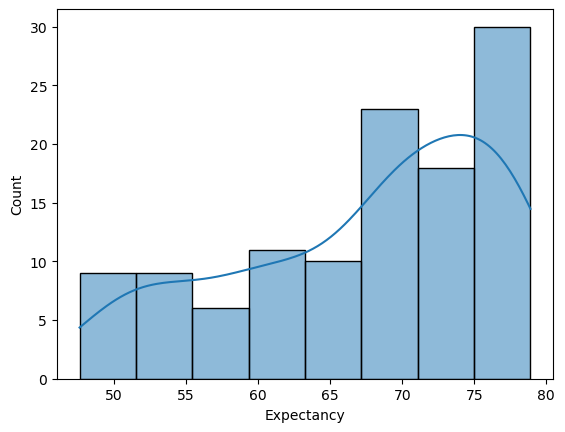

In [100]:
sns.histplot(data['Expectancy'], kde=True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


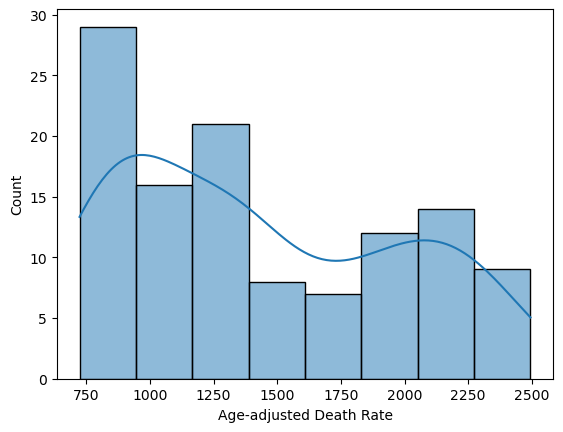

In [101]:
sns.histplot(data['Age-adjusted Death Rate'], kde=True)
plt.show() 

Typically, death rate trend would regress and life expectancy increases.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


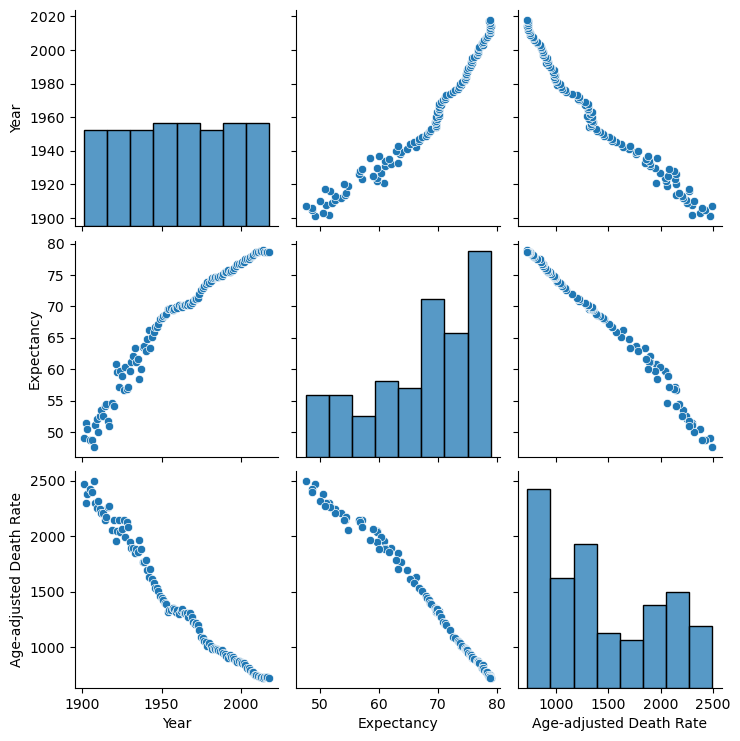

In [102]:
sns.pairplot(data)

Model Building

In [103]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [104]:
# subset x and y variable
X = data.drop(columns='Expectancy')
y = data['Expectancy']
# Splitting data into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [105]:
X.shape

(116, 4)

In [106]:
y.shape

(116,)

In [107]:
ols_formula = 'Expectancy ~ + Year'
OLS = ols(formula=ols_formula, data=data)
model=OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Expectancy   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1777.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.29e-71
Time:                        14:31:21   Log-Likelihood:                -257.63
No. Observations:                 116   AIC:                             519.3
Df Residuals:                     114   BIC:                             524.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -444.0311     12.138    -36.582      0.000    -468.076    -419.986
Year           0.2610      0.006     42.152      0.000       0.249       0.273
==============================================================================
Omnibus:                        4.798   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.089
Skew:                          -0.367   Prob(JB):                        0.129
Kurtosis:                       2.445   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

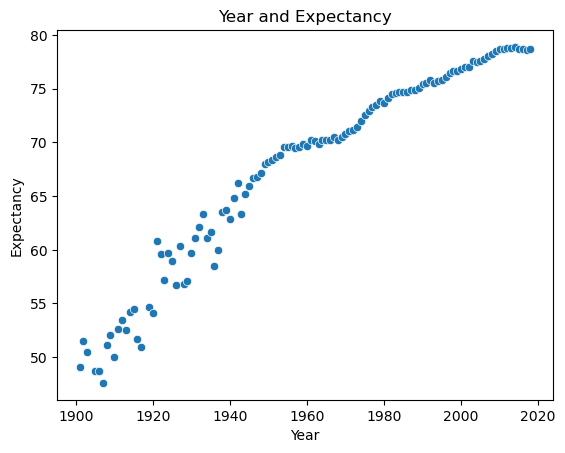

In [108]:
# Linearity
# Create a scatterplot for each independent variable and the dependent variable.
sns.scatterplot(x=data['Year'],y=data['Expectancy'])
plt.title('Year and Expectancy')
plt.xlabel('Year')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


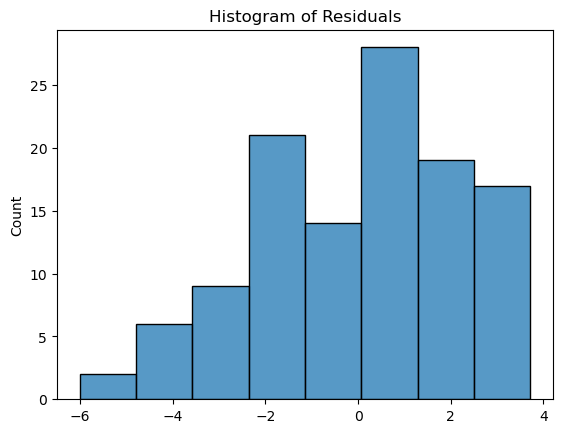

In [109]:
# Normality
residuals = model.resid
# Create a histogram with the residuals
sns.histplot(residuals)
plt.title('Histogram of Residuals')
plt.show()

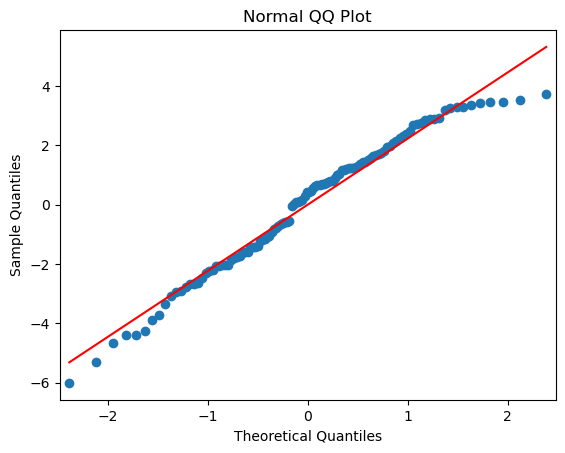

In [110]:
# QQ Plot
sm.qqplot(residuals, line='s')
plt.title('Normal QQ Plot')
plt.show()

In [112]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Pred': y_pred})
comparison.head()

,Actual,Pred
100,77.6,78.664421
113,78.7,82.056853
41,65.2,63.267998
85,74.9,74.750076
114,78.6,82.317809
